### Adding a custom callback for keras during embedding
This notebook shows you how to use custom callbacks during training. In this example, we use early stopping to train the network until loss reaches some desired plateau. 

### load data

In [4]:
from tensorflow.keras.datasets import mnist
(train_images, Y_train), (test_images, Y_test) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], -1))/255.
test_images = test_images.reshape((test_images.shape[0], -1))/255.

### create parametric umap model

In [5]:
from umap.parametric_umap import ParametricUMAP

In [6]:
keras_fit_kwargs = {"callbacks": [
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        min_delta=10**-2,
        patience=10,
        verbose=1,
    )
]}

In [7]:
embedder = ParametricUMAP(
    verbose=True,
    keras_fit_kwargs = keras_fit_kwargs,
    n_training_epochs=5
)

In [8]:
embedding = embedder.fit_transform(train_images)

ParametricUMAP(keras_fit_kwargs={'callbacks': [<tensorflow.python.keras.callbacks.EarlyStopping object at 0x7fd30942f7b8>]},
               n_training_epochs=20,
               optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7fd30942f668>)
Construct fuzzy simplicial set
Sun Aug 16 23:03:53 2020 Finding Nearest Neighbors
Sun Aug 16 23:03:53 2020 Building RP forest with 17 trees
Sun Aug 16 23:03:55 2020 parallel NN descent for 16 iterations
	 0  /  16
	 1  /  16
	 2  /  16
	 3  /  16
	 4  /  16
Sun Aug 16 23:04:05 2020 Finished Nearest Neighbor Search
Sun Aug 16 23:04:08 2020 Construct embedding
Epoch 1/200
724/724 [==============================] - 13s 19ms/step - loss: 0.2263
Epoch 2/200
724/724 [==============================] - 14s 19ms/step - loss: 0.1717
Epoch 3/200
724/724 [==============================] - 14s 19ms/step - loss: 0.1561
Epoch 4/200
724/724 [==============================] - 14s 19ms/step - loss: 0.1463
Epoch 5/200
724/724 [====================

### plot results

In [9]:
embedding = embedder.embedding_

In [10]:
import matplotlib.pyplot as plt

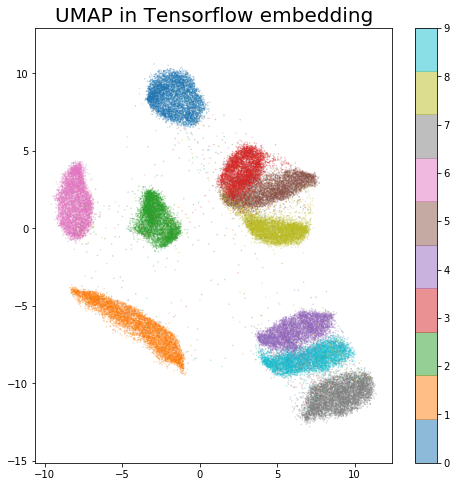

In [11]:
fig, ax = plt.subplots( figsize=(8, 8))
sc = ax.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=Y_train.astype(int),
    cmap="tab10",
    s=0.1,
    alpha=0.5,
    rasterized=True,
)
ax.axis('equal')
ax.set_title("UMAP in Tensorflow embedding", fontsize=20)
plt.colorbar(sc, ax=ax);

### plotting loss

In [12]:
embedder._history.keys()

dict_keys(['loss'])

KeyError: 'reconstruction_loss'

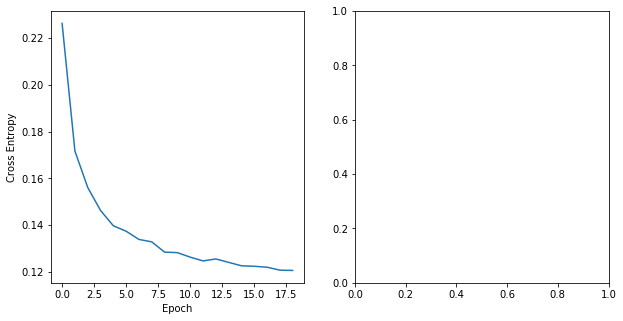

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(embedder._history['loss'])
ax.set_ylabel('Cross Entropy')
ax.set_xlabel('Epoch')